# fog 2 data topology analysis

In [3]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
from seaborn import *

In [4]:
data1 = read_csv ('C:\\Users\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_5.csv')
data1.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.0,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.0,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.0,65.000035
3,12,COMP_M,app1,Mod1,M.sens,22,54,78,23,Sensor,16.000000,68.000033,84.000033,50.0,68.000033
4,6,COMP_M,app1,Mod1,M.sens,10,53,66,15,Sensor,16.000000,68.000035,84.000035,50.0,68.000035


In [5]:
df1 = DataFrame (data1)

In [6]:
df1

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,app1,Mod1,M.sens,0,52,56,0,Sensor,10.666667,65.000032,75.666699,50.000000,65.000032
1,21,COMP_M,app1,Mod1,M.sens,40,56,96,30,Sensor,8.000000,65.000032,73.000032,50.000000,65.000032
2,17,COMP_M,app1,Mod1,M.sens,32,55,88,26,Sensor,10.666667,65.000035,75.666701,50.000000,65.000035
3,12,COMP_M,app1,Mod1,M.sens,22,54,78,23,Sensor,16.000000,68.000033,84.000033,50.000000,68.000033
4,6,COMP_M,app1,Mod1,M.sens,10,53,66,15,Sensor,16.000000,68.000035,84.000035,50.000000,68.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,156,SINK_M,app1,Actuator,M.result1,53,1,15,57,Mod1,0.000000,1995.666891,1995.666891,384.000035,1995.666891
855,470,COMP_M,app1,Mod1,M.sens,38,50,94,4,Sensor,0.001000,1996.000418,1996.001418,950.000000,1996.000418
856,954,COMP_M,app1,Mod1,M.sens,6,52,62,0,Sensor,10.666667,1997.000032,2007.666699,1950.000000,1968.000040
857,975,COMP_M,app1,Mod1,M.sens,48,56,104,30,Sensor,8.000000,1997.000032,2005.000032,1950.000000,1968.000043


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              859 non-null    int64  
 1   type            859 non-null    object 
 2   app             859 non-null    object 
 3   module          859 non-null    object 
 4   message         859 non-null    object 
 5   DES.src         859 non-null    int64  
 6   DES.dst         859 non-null    int64  
 7   TOPO.src        859 non-null    int64  
 8   TOPO.dst        859 non-null    int64  
 9   module.src      859 non-null    object 
 10  service         859 non-null    float64
 11  time_in         859 non-null    float64
 12  time_out        859 non-null    float64
 13  time_emit       859 non-null    float64
 14  time_reception  859 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 100.8+ KB


In [8]:
df1.describe()

,id,DES.src,DES.dst,TOPO.src,TOPO.dst,service,time_in,time_out,time_emit,time_reception
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,416.506403,29.107101,45.967404,70.031432,23.792782,8.596121,1034.613182,1043.209303,864.453636,1023.634918
std,288.706852,17.727415,18.911310,30.290439,17.754185,5.337155,560.522023,560.421721,571.024845,560.752737
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,65.000032,73.000032,50.000000,65.000032
25%,153.000000,12.000000,52.000000,60.000000,4.000000,8.000000,551.333391,557.666700,350.000000,548.166746
50%,380.000000,32.000000,53.000000,76.000000,26.000000,10.666667,1031.000032,1036.333368,800.000000,1018.000040
75%,657.500000,44.000000,55.000000,92.000000,30.000000,10.666667,1518.000040,1528.166773,1350.000000,1515.000036
max,975.000000,56.000000,56.000000,104.000000,57.000000,16.000000,1997.000035,2007.666701,1950.000000,1996.000418


In [10]:
time_in = df1 ['time_in'].tolist()

In [11]:
mean_time_in = sum (time_in) // len (time_in)

# Time in

In [12]:
time_in

[65.00003203003003,
 65.00003212048193,
 65.00003467973856,
 68.00003253435115,
 68.00003484072249,
 73.00003212048193,
 75.6666986966967,
 75.66670134640523,
 81.00003212048193,
 84.00003253435115,
 84.00003484072249,
 86.33336536336337,
 86.3333680130719,
 89.00003212048193,
 90.6667002981982,
 97.00003203003004,
 97.00003212048192,
 97.00003467973858,
 100.00003253435116,
 100.00003484072248,
 105.6667017996997,
 107.66669869669671,
 107.66670134640523,
 115.00003212048192,
 118.00003484072248,
 118.00004529004327,
 118.33336536336338,
 118.33336801307192,
 120.6667033012012,
 123.00003212048192,
 129.00003203003004,
 129.00003467973858,
 131.00003212048193,
 135.6667048027027,
 139.00003212048193,
 139.6666986966967,
 139.66670134640523,
 147.00003212048193,
 150.6667063042042,
 164.00007252507052,
 165.00003203003,
 165.00003212048193,
 165.00003467973855,
 165.66670780570573,
 168.0000325343511,
 168.0000348407225,
 173.00003212048193,
 175.66669869669667,
 175.6667013464052,
 18

# mean time in

In [13]:
print ('mean time in: ', mean_time_in)

mean time in:  1034.0


In [15]:
time_out = df1 ['time_out'].tolist()

In [16]:
time_out

[75.6666986966967,
 73.00003212048193,
 75.66670134640523,
 84.00003253435115,
 84.00003484072249,
 81.00003212048193,
 86.33336536336337,
 86.3333680130719,
 89.00003212048193,
 100.00003253435116,
 100.00003484072248,
 97.00003203003004,
 97.00003467973858,
 97.00003212048192,
 90.6667002981982,
 107.66669869669671,
 105.00003212048192,
 107.66670134640523,
 116.00003253435116,
 116.00003484072248,
 105.6667017996997,
 118.33336536336338,
 118.33336801307192,
 123.00003212048192,
 134.0000348407225,
 134.0000452900433,
 129.00003203003004,
 129.00003467973858,
 120.6667033012012,
 131.00003212048193,
 139.6666986966967,
 139.66670134640523,
 139.00003212048193,
 135.6667048027027,
 147.00003212048193,
 150.33336536336336,
 150.3333680130719,
 155.00003212048193,
 150.6667063042042,
 164.00107252507053,
 175.66669869669667,
 173.00003212048193,
 175.6667013464052,
 165.66670780570573,
 184.00003253435116,
 184.0000348407225,
 181.00003212048196,
 186.33336536336333,
 186.3333680130718

In [17]:
mean_time_out = sum (time_out) // len (time_out)

In [18]:
print ('Time out: ', mean_time_out)

Time out:  1043.0


In [27]:
time_reception = df1 ['time_reception'].tolist()

In [28]:
time_reception

[65.00003203003003,
 65.00003212048193,
 65.00003467973856,
 68.00003253435115,
 68.00003484072249,
 65.00003672222222,
 65.00003230303031,
 65.00003696503497,
 65.00004519654428,
 68.00004529004329,
 68.0000499616307,
 65.00003295975233,
 65.0000371493849,
 68.00003672222222,
 90.6667002981982,
 65.00005914285714,
 68.00004349377593,
 68.000046345898,
 68.00006082352941,
 68.000061347181,
 105.6667017996997,
 68.00004024091778,
 68.00005126108374,
 115.00003212048192,
 118.00003484072248,
 118.00004529004327,
 115.00003203003004,
 115.00003467973856,
 120.6667033012012,
 115.00003672222222,
 115.0000323030303,
 115.00003696503497,
 115.00004519654428,
 135.6667048027027,
 118.00003672222222,
 115.00003295975232,
 118.000046345898,
 118.00004349377592,
 150.6667063042042,
 164.00007252507052,
 165.00003203003,
 165.00003212048193,
 165.00003467973855,
 165.66670780570573,
 168.0000325343511,
 168.0000348407225,
 165.0000367222222,
 165.0000323030303,
 165.00003696503495,
 180.666709307

In [29]:
mean_time_reception = sum (time_reception) // len (time_reception)

In [30]:
print ('mean time reception :-', mean_time_reception)

mean time reception :- 1023.0


In [23]:
time_emit = df1 ['time_emit'].tolist()

In [24]:
time_emit

[50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 75.6666986966967,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 86.33336536336337,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.00003203003004,
 100.0,
 100.0,
 100.0,
 100.0,
 107.66669869669671,
 100.0,
 100.0,
 100.0,
 100.0,
 118.33336536336338,
 50.0,
 150.0,
 150.0,
 150.0,
 75.66670134640523,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 129.00003203003004,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 50.0,
 150.0,
 139.6666986966967,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 84.00003484072249,
 100.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 150.33336536336336,
 200.0,
 200.0,
 200.0,
 100.0,
 200.0,
 86.3333680130719,
 200.0,
 200.0,
 200.0,
 175.66669869669667,
 50.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 186.33336536336333,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 73.00003212048193,
 250.0,
 250.0,
 50.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.

In [25]:
mean_time_emit = sum (time_emit) // len (time_emit)

In [26]:
print ('time emit :-', mean_time_emit)

time emit :- 864.0


In [31]:
data = []
data.append ('time in')
data.append ('time out')
data.append ('time reception')
data.append ('time emit')
dataValue = []
dataValue.append (mean_time_in)
dataValue.append (mean_time_out)
dataValue.append (mean_time_reception)
dataValue.append (mean_time_emit)

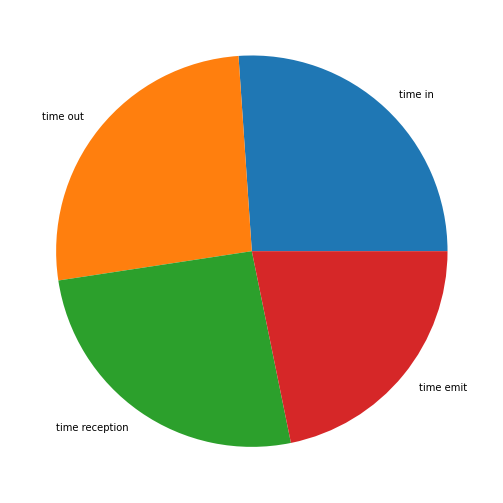

In [36]:
figure = plt.figure(figsize = (20, 9))
plt.pie (dataValue, labels = data)
plt.show ()

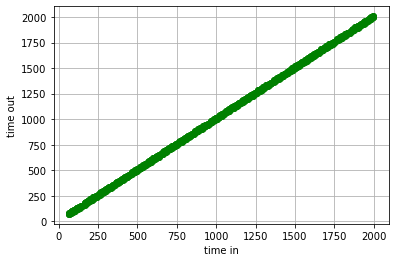

In [37]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

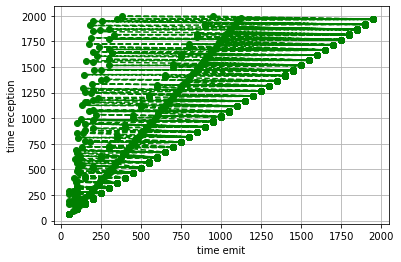

In [38]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

In [39]:
service = df1 ['service'].tolist()

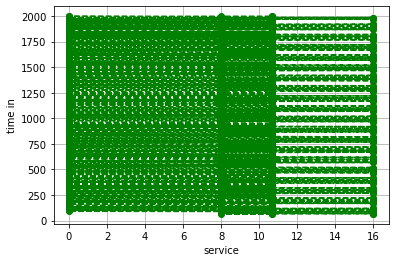

In [47]:
plt.plot (service, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

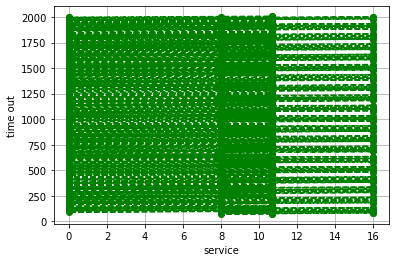

In [46]:
plt.plot (service, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

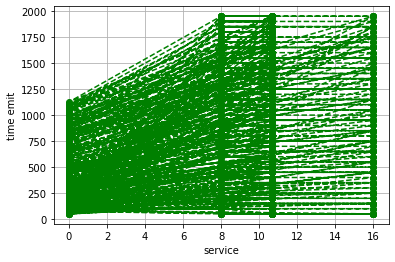

In [45]:
plt.plot (service, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

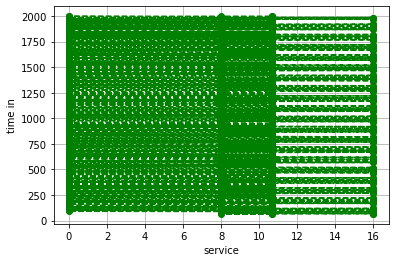

In [48]:
plt.plot (service, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('service')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

In [49]:
topo = df1 ['TOPO.src'].tolist()

In [50]:
topo

[56,
 96,
 88,
 78,
 66,
 98,
 58,
 86,
 102,
 76,
 70,
 60,
 94,
 100,
 0,
 64,
 104,
 90,
 80,
 68,
 0,
 62,
 92,
 96,
 66,
 76,
 56,
 88,
 0,
 98,
 58,
 86,
 102,
 0,
 100,
 60,
 90,
 104,
 0,
 84,
 56,
 96,
 88,
 26,
 78,
 66,
 98,
 58,
 86,
 0,
 102,
 76,
 70,
 60,
 90,
 72,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 15,
 94,
 56,
 96,
 88,
 66,
 76,
 98,
 58,
 86,
 0,
 102,
 60,
 90,
 64,
 100,
 26,
 62,
 104,
 92,
 0,
 82,
 56,
 96,
 88,
 78,
 66,
 0,
 98,
 58,
 86,
 102,
 76,
 70,
 30,
 60,
 90,
 74,
 100,
 62,
 104,
 92,
 80,
 68,
 0,
 92,
 56,
 96,
 88,
 0,
 66,
 76,
 98,
 58,
 86,
 15,
 102,
 60,
 90,
 62,
 100,
 0,
 62,
 104,
 92,
 0,
 56,
 96,
 88,
 78,
 66,
 98,
 58,
 86,
 26,
 102,
 76,
 70,
 72,
 60,
 90,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 0,
 94,
 56,
 96,
 88,
 66,
 76,
 30,
 98,
 58,
 86,
 102,
 0,
 64,
 60,
 90,
 100,
 62,
 104,
 92,
 0,
 56,
 96,
 88,
 15,
 78,
 66,
 98,
 58,
 86,
 0,
 102,
 76,
 70,
 74,
 60,
 90,
 100,
 0,
 62,
 104,
 92,
 80,
 68,
 26,
 94,
 56,
 96

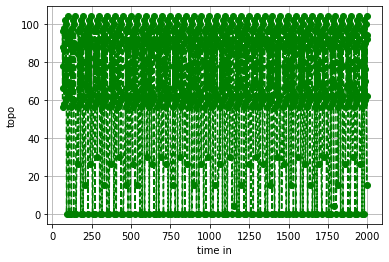

In [51]:
plt.plot (time_in, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

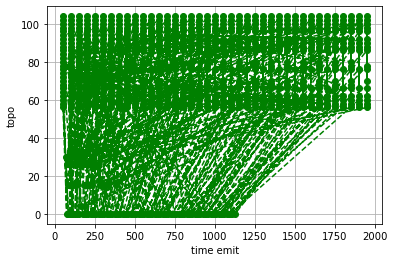

In [52]:
plt.plot (time_emit, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

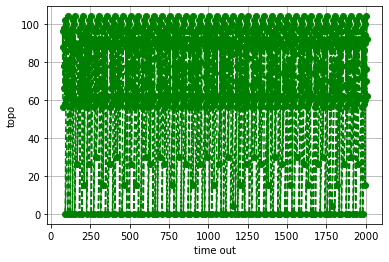

In [53]:
plt.plot (time_out, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time out')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

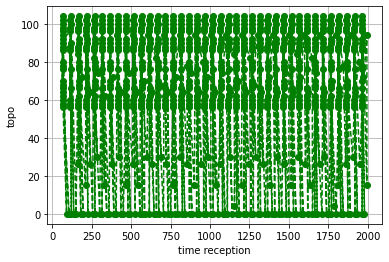

In [54]:
plt.plot (time_reception, topo, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time reception')
plt.ylabel ('topo')
plt.grid (True)
plt.show ()

In [55]:
des = df1 ['DES.src'].tolist ()
des

[0,
 40,
 32,
 22,
 10,
 42,
 2,
 30,
 46,
 20,
 14,
 4,
 38,
 44,
 52,
 8,
 48,
 34,
 24,
 12,
 52,
 6,
 36,
 40,
 10,
 20,
 0,
 32,
 52,
 42,
 2,
 30,
 46,
 52,
 44,
 4,
 34,
 48,
 52,
 28,
 0,
 40,
 32,
 55,
 22,
 10,
 42,
 2,
 30,
 52,
 46,
 20,
 14,
 4,
 34,
 16,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 53,
 38,
 0,
 40,
 32,
 10,
 20,
 42,
 2,
 30,
 52,
 46,
 4,
 34,
 8,
 44,
 55,
 6,
 48,
 36,
 52,
 26,
 0,
 40,
 32,
 22,
 10,
 52,
 42,
 2,
 30,
 46,
 20,
 14,
 56,
 4,
 34,
 18,
 44,
 6,
 48,
 36,
 24,
 12,
 52,
 36,
 0,
 40,
 32,
 52,
 10,
 20,
 42,
 2,
 30,
 53,
 46,
 4,
 34,
 6,
 44,
 52,
 6,
 48,
 36,
 52,
 0,
 40,
 32,
 22,
 10,
 42,
 2,
 30,
 55,
 46,
 20,
 14,
 16,
 4,
 34,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 52,
 38,
 0,
 40,
 32,
 10,
 20,
 56,
 42,
 2,
 30,
 46,
 52,
 8,
 4,
 34,
 44,
 6,
 48,
 36,
 52,
 0,
 40,
 32,
 53,
 22,
 10,
 42,
 2,
 30,
 52,
 46,
 20,
 14,
 18,
 4,
 34,
 44,
 52,
 6,
 48,
 36,
 24,
 12,
 55,
 38,
 0,
 40,
 32,
 10,
 20,
 42,
 2,
 30,
 52,
 46,
 8,
 4

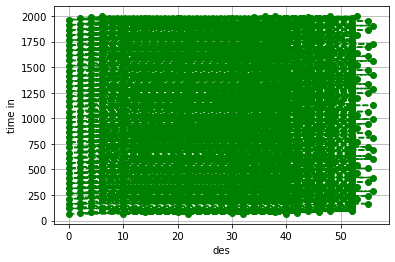

In [56]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

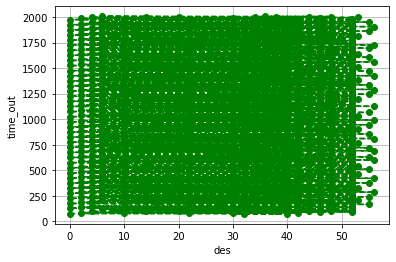

In [57]:
plt.plot (des, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time_out')
plt.grid (True)
plt.show ()

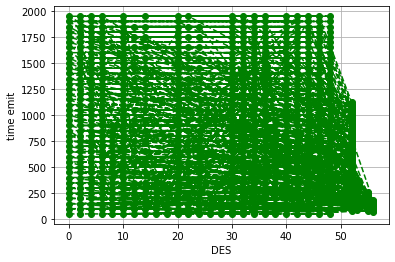

In [58]:
plt.plot (des, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('DES')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

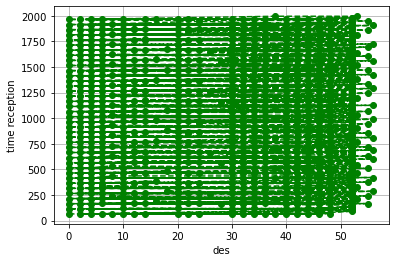

In [59]:
plt.plot (des, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

In [62]:
des_dst = df1 ['DES.dst'].tolist ()
des_dst

[52,
 56,
 55,
 54,
 53,
 56,
 52,
 55,
 56,
 54,
 53,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 52,
 55,
 56,
 53,
 54,
 52,
 55,
 1,
 56,
 52,
 55,
 56,
 1,
 56,
 52,
 55,
 56,
 1,
 50,
 52,
 56,
 55,
 1,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 56,
 52,
 55,
 1,
 56,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 1,
 50,
 52,
 56,
 55,
 54,
 53,
 1,
 56,
 52,
 55,
 56,
 54,
 53,
 1,
 52,
 55,
 50,
 56,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 1,
 53,
 54,
 56,
 52,
 55,
 1,
 56,
 52,
 55,
 50,
 56,
 1,
 52,
 56,
 55,
 1,
 52,
 56,
 55,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 50,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 1,
 56,
 52,
 55,
 56,
 1,
 50,
 52,
 55,
 56,
 52,
 56,
 55,
 1,
 52,
 56,
 55,
 1,
 54,
 53,
 56,
 52,
 55,
 1,
 56,
 54,
 53,
 50,
 52,
 55,
 56,
 1,
 52,
 56,
 55,
 54,
 53,
 1,
 50,
 52,
 56,
 55,
 53,
 54,
 56,
 52,
 55,
 1,


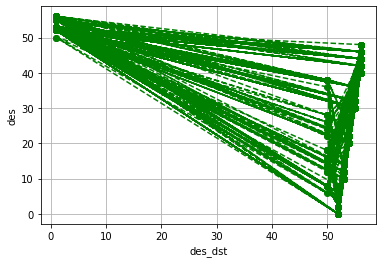

In [64]:
plt.plot (des_dst, des, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des_dst')
plt.ylabel ('des')
plt.grid (True)
plt.show ()

In [65]:
data2 = read_csv ('C:\\Users\\DELL\\Desktop\\NIT research\\pythonsim\\python sim\\fog2_random_topology\\Results\\Results_dynamic-cluster_2000_5_6.csv')
data2.head ()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.0,65.000035
2,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.0,65.000036
3,13,COMP_M,app1,Mod1,M.sens,25,64,86,23,Sensor,16.000000,65.000038,81.000038,50.0,65.000038
4,8,COMP_M,app1,Mod1,M.sens,15,63,76,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053


In [66]:
df2 = DataFrame (data2)
df2

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,5,COMP_M,app1,Mod1,M.sens,9,62,70,0,Sensor,10.666667,65.000034,75.666701,50.0,65.000034
1,19,COMP_M,app1,Mod1,M.sens,37,65,98,26,Sensor,10.666667,65.000035,75.666702,50.0,65.000035
2,25,COMP_M,app1,Mod1,M.sens,49,66,110,30,Sensor,8.000000,65.000036,73.000036,50.0,65.000036
3,13,COMP_M,app1,Mod1,M.sens,25,64,86,23,Sensor,16.000000,65.000038,81.000038,50.0,65.000038
4,8,COMP_M,app1,Mod1,M.sens,15,63,76,15,Sensor,16.000000,65.000053,81.000053,50.0,65.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,1161,COMP_M,app1,Mod1,M.sens,41,65,102,26,Sensor,10.666667,1997.000035,2007.666702,1950.0,1968.000036
933,1166,COMP_M,app1,Mod1,M.sens,51,66,112,30,Sensor,8.000000,1997.000036,2005.000036,1950.0,1968.000040
934,1155,COMP_M,app1,Mod1,M.sens,29,64,90,23,Sensor,16.000000,1997.000038,2013.000038,1950.0,1968.000054
935,1144,COMP_M,app1,Mod1,M.sens,7,62,68,0,Sensor,10.666667,1997.000040,2007.666706,1950.0,1968.000061


In [67]:
time_in = df2 ['time_in'].tolist ()
time_in

[65.00003436245954,
 65.00003516749585,
 65.00003612969283,
 65.00003816636529,
 65.0000525050505,
 73.00003612969283,
 75.66670102912622,
 75.66670183416252,
 81.00003612969283,
 81.00003816636529,
 81.0000525050505,
 86.33336769579289,
 86.3333685008292,
 89.00003612969283,
 90.6667030052988,
 97.00003436245956,
 97.00003516749588,
 97.00003612969284,
 97.00003816636529,
 97.0000525050505,
 105.00003612969284,
 105.66670488147142,
 107.66670102912624,
 107.66670183416254,
 115.00003612969284,
 115.00003816636529,
 115.0000525050505,
 118.3333676957929,
 118.3333685008292,
 120.66670675764402,
 123.00003612969284,
 129.00003436245956,
 129.00003516749587,
 131.00003612969283,
 131.00003816636527,
 131.00005250505052,
 135.66670863381665,
 139.00003612969283,
 139.66670102912622,
 139.66670183416252,
 147.00003612969283,
 150.66671050998923,
 155.00003612969283,
 164.00005402002,
 164.00105402002,
 165.00003516749584,
 165.00003612969283,
 165.00003816636527,
 165.00003952345216,
 165.

In [68]:
time_in_mean = sum (time_in) // len (time_in)
print ('mean time in :- ', time_in_mean)

mean time in :-  1033.0


In [69]:
time_out = df2 ['time_out'].tolist ()
time_out

[75.66670102912622,
 75.66670183416252,
 73.00003612969283,
 81.00003816636529,
 81.0000525050505,
 81.00003612969283,
 86.33336769579289,
 86.3333685008292,
 89.00003612969283,
 97.00003816636529,
 97.0000525050505,
 97.00003436245956,
 97.00003516749588,
 97.00003612969284,
 90.6667030052988,
 107.66670102912624,
 107.66670183416254,
 105.00003612969284,
 113.00003816636529,
 113.0000525050505,
 113.00003612969284,
 105.66670488147142,
 118.3333676957929,
 118.3333685008292,
 123.00003612969284,
 131.00003816636527,
 131.00005250505052,
 129.00003436245956,
 129.00003516749587,
 120.66670675764402,
 131.00003612969283,
 139.66670102912622,
 139.66670183416252,
 139.00003612969283,
 147.00003816636527,
 147.00005250505052,
 135.66670863381665,
 147.00003612969283,
 150.33336769579287,
 150.33336850082918,
 155.00003612969283,
 150.66671050998923,
 163.00003612969283,
 164.00105402002,
 164.00205402002,
 175.6667018341625,
 173.00003612969283,
 181.00003816636527,
 175.66670619011882,


In [70]:
time_out_mean = sum (time_out) // len (time_out)
print ('time out mean value :- ', time_out_mean)

time out mean value :-  1042.0


In [71]:
time_emit = df2 ['time_emit'].tolist ()
time_emit

[50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 75.66670102912622,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 86.33336769579289,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.00003436245956,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 107.66670102912624,
 100.0,
 100.0,
 100.0,
 100.0,
 118.3333676957929,
 100.0,
 50.0,
 50.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 75.66670183416252,
 150.0,
 150.0,
 150.0,
 129.00003436245956,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 50.0,
 50.0,
 150.0,
 139.66670102912622,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 150.0,
 81.0000525050505,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 150.33336769579287,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 200.0,
 86.3333685008292,
 200.0,
 200.0,
 200.0,
 200.0,
 175.66670619011882,
 50.0,
 100.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 186.33337285678547,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 250.0,
 73.00003612969283,

In [72]:
time_emit_mean = sum (time_emit) // len (time_emit)

In [73]:
print ('time emit mean :- ', time_emit_mean)

time emit mean :-  866.0


In [74]:
time_reception = df2 ['time_reception'].tolist ()
time_reception

[65.00003436245954,
 65.00003516749585,
 65.00003612969283,
 65.00003816636529,
 65.0000525050505,
 65.00004482655247,
 65.00003952345216,
 65.00004144773176,
 65.00005381347151,
 68.00004083495146,
 65.00006206006006,
 65.00004694382022,
 68.000034,
 68.00003896857672,
 90.6667030052988,
 65.00004851162791,
 68.00003578378379,
 68.00004038771593,
 68.00005421932116,
 68.00003544481606,
 68.00004654342985,
 105.66670488147142,
 68.00006117159764,
 68.00003829764066,
 115.00003612969284,
 115.00003816636529,
 115.0000525050505,
 115.00003952345216,
 115.00003516749584,
 120.66670675764402,
 115.00004482655244,
 115.00004694382022,
 118.000034,
 115.0000538134715,
 118.00004083495143,
 115.00006206006006,
 135.66670863381665,
 118.0000389685767,
 115.00004851162792,
 118.00003578378376,
 118.00004038771591,
 150.66671050998923,
 118.00004654342985,
 164.00005402002,
 164.00007202002,
 165.00003516749584,
 165.00003612969283,
 165.00003816636527,
 165.00003952345216,
 165.0000525050505,
 

In [75]:
time_reception_mean = sum (time_reception) // len (time_reception)

In [76]:
print ('time reception mean data:- ', time_reception_mean)

time reception mean data:-  1021.0


In [78]:
data = []
data.append (time_in_mean)
data.append (time_out_mean)
data.append (time_emit_mean)
data.append (time_reception_mean)
data

[1033.0, 1042.0, 866.0, 1021.0]

In [79]:
datalabels = []
datalabels.append ('time in')
datalabels.append ('time out')
datalabels.append ('time emit')
datalabels.append ('time reception')
datalabels

['time in', 'time out', 'time emit', 'time reception']

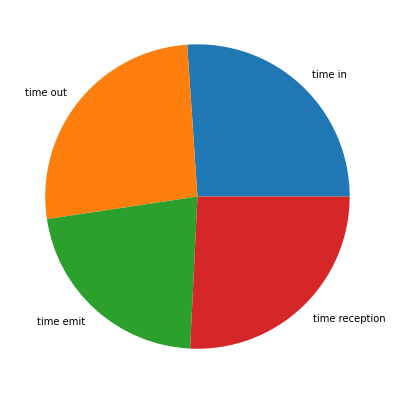

In [81]:
figure = plt.figure (figsize = (20, 7))
plt.pie (data, labels = datalabels)
plt.show ()

In [82]:
des = df2 ['DES.src'].tolist ()
des

[9,
 37,
 49,
 25,
 15,
 57,
 1,
 43,
 59,
 27,
 13,
 5,
 39,
 55,
 62,
 3,
 41,
 51,
 29,
 17,
 53,
 62,
 7,
 45,
 49,
 25,
 15,
 1,
 37,
 62,
 57,
 5,
 39,
 59,
 27,
 13,
 62,
 55,
 3,
 41,
 51,
 62,
 53,
 33,
 47,
 37,
 49,
 25,
 1,
 15,
 65,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 39,
 3,
 11,
 21,
 55,
 62,
 41,
 51,
 29,
 7,
 17,
 53,
 63,
 37,
 49,
 25,
 1,
 15,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 39,
 3,
 55,
 65,
 41,
 51,
 7,
 53,
 62,
 35,
 43,
 37,
 49,
 25,
 1,
 15,
 62,
 57,
 43,
 5,
 59,
 27,
 13,
 66,
 39,
 3,
 9,
 19,
 55,
 41,
 51,
 29,
 7,
 17,
 62,
 53,
 37,
 49,
 25,
 1,
 15,
 62,
 57,
 43,
 5,
 63,
 59,
 27,
 13,
 39,
 3,
 55,
 62,
 41,
 51,
 7,
 53,
 62,
 31,
 47,
 37,
 49,
 25,
 1,
 15,
 57,
 43,
 5,
 65,
 59,
 27,
 13,
 11,
 23,
 39,
 3,
 55,
 62,
 41,
 51,
 29,
 7,
 17,
 53,
 62,
 37,
 49,
 25,
 1,
 15,
 66,
 57,
 43,
 5,
 59,
 27,
 13,
 62,
 39,
 3,
 55,
 41,
 51,
 7,
 62,
 53,
 45,
 37,
 49,
 25,
 1,
 15,
 63,
 57,
 43,
 5,
 62,
 59,
 27,
 13,
 7,
 21,
 39,
 3,
 5

In [83]:
des_dst = df2 ['DES.dst'].tolist ()
des_dst

[62,
 65,
 66,
 64,
 63,
 66,
 62,
 65,
 66,
 64,
 63,
 62,
 65,
 66,
 0,
 62,
 65,
 66,
 64,
 63,
 66,
 0,
 62,
 65,
 66,
 64,
 63,
 62,
 65,
 0,
 66,
 62,
 65,
 66,
 64,
 63,
 0,
 66,
 62,
 65,
 66,
 0,
 66,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 60,
 60,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 66,
 0,
 65,
 66,
 62,
 66,
 0,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 66,
 64,
 63,
 0,
 65,
 62,
 60,
 60,
 66,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 65,
 62,
 66,
 0,
 65,
 66,
 62,
 66,
 0,
 60,
 60,
 65,
 66,
 64,
 62,
 63,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 60,
 60,
 65,
 62,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 66,
 0,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 66,
 64,
 63,
 0,
 65,
 62,
 66,
 65,
 66,
 62,
 0,
 66,
 60,
 65,
 66,
 64,
 62,
 63,
 0,
 66,
 65,
 62,
 0,
 66,
 64,
 63,
 60,
 60,
 6

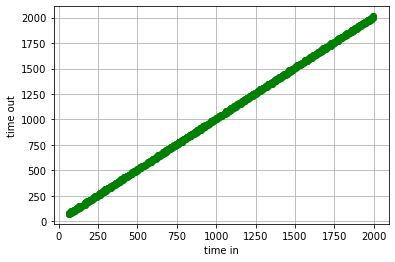

In [84]:
plt.plot (time_in, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time in')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

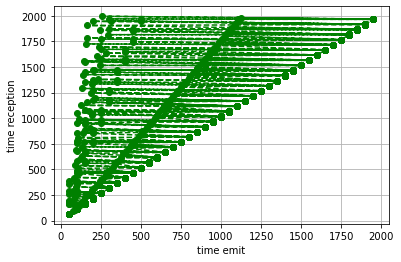

In [85]:
plt.plot (time_emit, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('time emit')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()

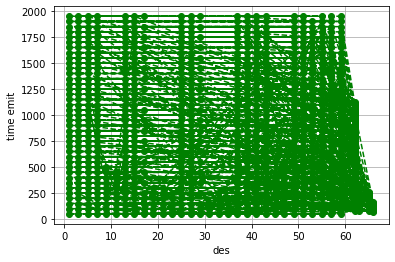

In [90]:
plt.plot (des, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

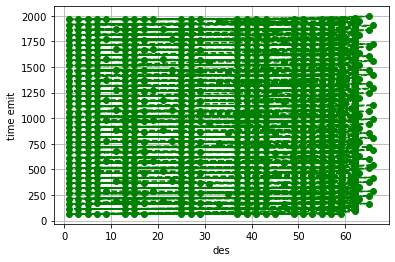

In [87]:
plt.plot (des, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

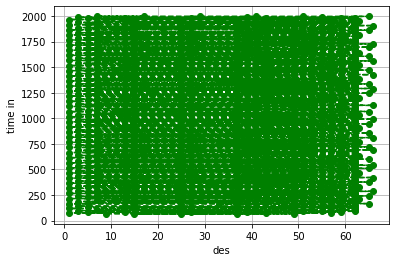

In [89]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

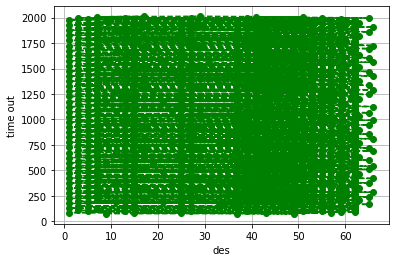

In [91]:
plt.plot (des, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

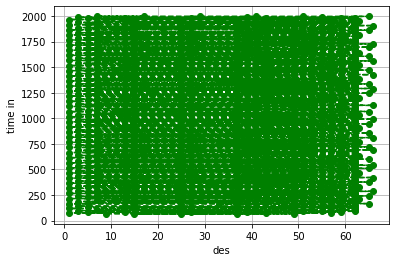

In [92]:
plt.plot (des, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

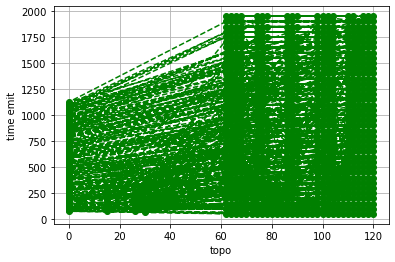

In [94]:
topo = df2 ['TOPO.src'].tolist ()
plt.plot (topo, time_emit, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('topo')
plt.ylabel ('time emit')
plt.grid (True)
plt.show ()

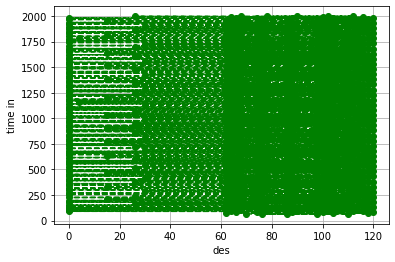

In [96]:
plt.plot (topo, time_in, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time in')
plt.grid (True)
plt.show ()

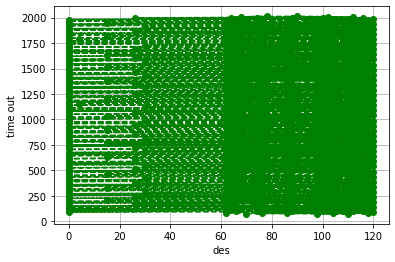

In [97]:
plt.plot (topo, time_out, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time out')
plt.grid (True)
plt.show ()

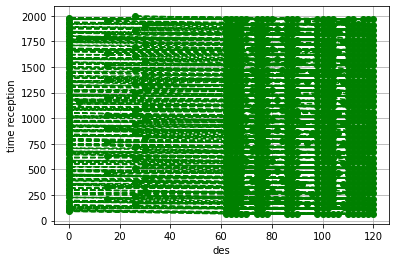

In [98]:
plt.plot (topo, time_reception, linestyle = 'dashed', marker = 'o', color = 'green')
plt.xlabel ('des')
plt.ylabel ('time reception')
plt.grid (True)
plt.show ()